# TP3 - Machine Learning
El objetivo de este trabajo es desarrollar y evaluar modelos basados en redes neuronales,incorporando técnicas de ablación para entender el impacto de diversas modificaciones en el proceso de entrenamiento y en la capacidad de generalización del modelo. No se permite usar librerías de machine learning como scikit-learn o PyTorch, a menos que sea pedido explícitamente en el enunciado del ejercicio.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import importlib

In [6]:
import sys
import os
np.random.seed(122404)
# sys.path.append('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/src')
sys.path.append(os.path.abspath('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/src'))

In [7]:
import models as md
importlib.reload(md)
import data_splitting as ds
importlib.reload(ds)
import metricas as mt
importlib.reload(mt)
import auxiliares as aux
importlib.reload(aux)

<module 'auxiliares' from 'c:\\Users\\felic\\OneDrive\\Documentos\\GitHub\\MLyDL_TPs\\Marolda_Felicitas_TP3\\src\\auxiliares.py'>

In [8]:
# Cargar los archivos .npy
X_COMP = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/X_COMP.npy')
X_images = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/X_images.npy')
y_images = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/y_images.npy')

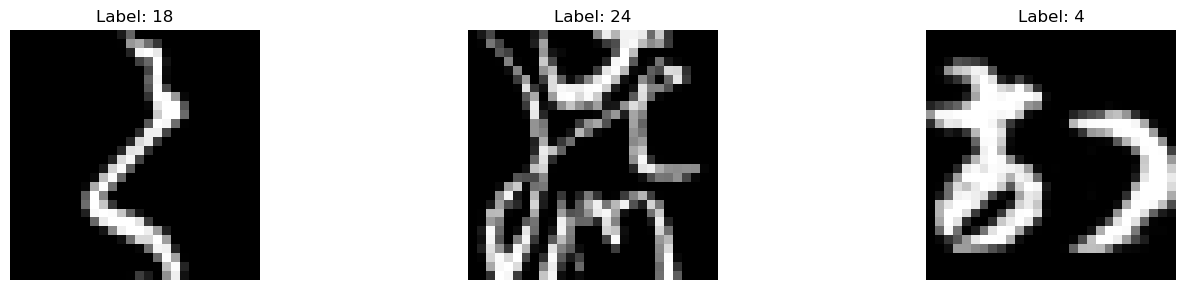

In [9]:
# Choose random pictures from X_images
num_images_to_display = 3
random_indices = np.random.choice(len(X_images), num_images_to_display, replace=False)

plt.figure(figsize=(15, 3))

for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(X_images[idx].reshape(28, 28), cmap='gray')  # Assuming images are 28x28
    plt.title(f"Label: {y_images[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Dividir el conjunto de datos en tres subconjuntos: Train, Validation y Test

In [10]:
importlib.reload(ds)
# Split the data into train and temp (temporary set for further splitting)
X_normalized = ds.normalize(X_images)
X_train, X_val, X_test, y_train, y_val, y_test = ds.split_data(X_normalized, y_images)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (3000, 784)
X_val shape: (1000, 784)
X_test shape: (1000, 784)


### 2) Implementación y Entrenamiento de una Red Neuronal Básica
- Implementar una red neuronal con L capas ocultas cada con M(l) nodos con función de activación ReLU (en las capas ocultas) y activación softmax para la capa de salida.
- Implementar un algoritmo para entrenar dicha red, mediante backpropagation y gradiente descendiente estándar, utilizando como función de costo la cross-entropy.

NOTA: El algoritmo backpropagation debe sera adaptado para el caso de clasificación multi-clase con función de activación softmax para la capa de salida y función de costo cross-entropy.

- Entrenar una red neuronal con 2 capas ocultas, con 100 y 80 nodos respectivamente, y graficar la evolución de la función de costo (cross-entropy) sobre los conjuntos de entrenamiento y validación a lo largo de las épocas. Llamaremos a este modelo M0

Epoch 0, Loss: 4.011714871685142
loss val: 1.3366634623886713
Epoch 10, Loss: 3.7937602782856454
loss val: 1.276053419104105
Epoch 20, Loss: 3.65606514605996
loss val: 1.2408005499927657
Epoch 30, Loss: 3.5026947126203054
loss val: 1.2001908604674083
Epoch 40, Loss: 3.321470454228951
loss val: 1.1500316265811508
Epoch 50, Loss: 3.1095221122135603
loss val: 1.0895999709273638
Epoch 60, Loss: 2.877384035765197
loss val: 1.0225882261209878
Epoch 70, Loss: 2.6476737046346015
loss val: 0.9552127666528871
Epoch 80, Loss: 2.441694184055507
loss val: 0.8957845528884552
Epoch 90, Loss: 2.2641578868503722
loss val: 0.8463680406933611
Epoch 100, Loss: 2.112114106092578
loss val: 0.805369444905057
Epoch 110, Loss: 1.982267100258831
loss val: 0.7715093360589332
Epoch 120, Loss: 1.870883846463221
loss val: 0.7435527594693645
Epoch 130, Loss: 1.7742170147032135
loss val: 0.7202021219075473
Epoch 140, Loss: 1.6893846871168519
loss val: 0.7002441552330468
Epoch 150, Loss: 1.6138036537550604
loss val: 0

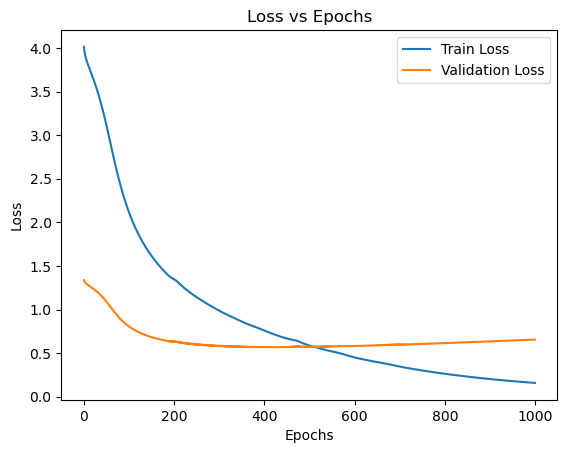

In [11]:
importlib.reload(md)

m0 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "softmax"], [100,80])


Reportar las siguientes métricas de performance, sobre los conjuntos de entrenamiento
y validación, para el modelo base entrenado:
- Accuracy
- Cross-Entropy
- Matriz de Confusión

Accuracy: 0.5870
Cross Entropy: 1.9668


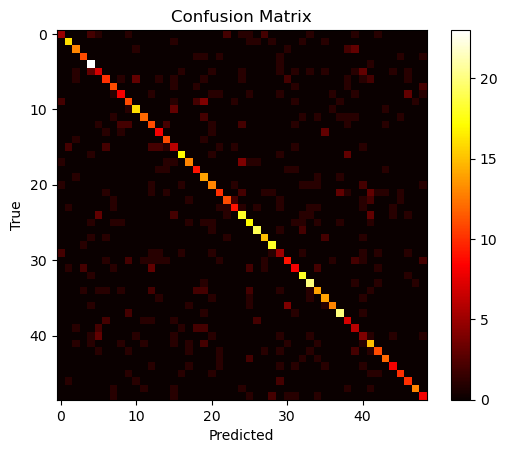

In [12]:
importlib.reload(mt)
y_pred_val = m0.forward_pass(X_val, False)
get_metrics = mt.get_metrics(y_pred_val, y_val)

### 3) Implementación y Entrenamiento de una Red Neuronal Avanzada

Implementar las siguientes mejoras al algoritmo de entrenamiento, y para cada una reportar el efecto observado sobre el tiempo de entrenamiento y la performance del modelo resultante.
- Rate scheduling lineal (con saturación) y exponencial.
- Mini-batch stochastic gradient descent.
- Optimizador ADAM.
- Regularización L2.
- Regularización mediante early stopping.
- OPCIONAL: Regularización mediante dropout.
- OPCIONAL: batch normalization.


In [13]:
funciones_de_activacion = ["ReLU", "ReLU", "softmax"]
nodos_por_capa = [100, 80]

Epoch 0, Loss: 3.9755400046716374
loss val: 1.3323479273524452
Epoch 10, Loss: 3.729194361858526
loss val: 1.2608416679359256
Epoch 20, Loss: 3.5482241024066594
loss val: 1.2105508975783468
Epoch 30, Loss: 3.3435493429284526
loss val: 1.1540564409475587
Epoch 40, Loss: 3.11630124382381
loss val: 1.0893914732371917
Epoch 50, Loss: 2.8834310863661807
loss val: 1.0207974697236784
Epoch 60, Loss: 2.663891328647746
loss val: 0.9558051508066092
Epoch 70, Loss: 2.470803444505647
loss val: 0.899724155227048
Epoch 80, Loss: 2.304983183125121
loss val: 0.8533613235195722
Epoch 90, Loss: 2.164054560527029
loss val: 0.8155654135100552
Epoch 100, Loss: 2.0441917986066294
loss val: 0.7848194849266538
Epoch 110, Loss: 1.9410425762306835
loss val: 0.7592392187927164
Epoch 120, Loss: 1.851081755610132
loss val: 0.7377736037103187
Epoch 130, Loss: 1.7716737907078657
loss val: 0.7196539245680674
Epoch 140, Loss: 1.7011119557781706
loss val: 0.7043337561712759
Epoch 150, Loss: 1.6377464497096594
loss val:

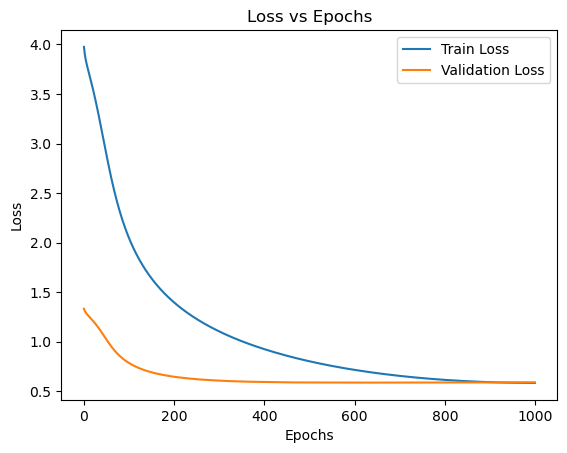

Accuracy: 0.5770
Cross Entropy: 1.7705


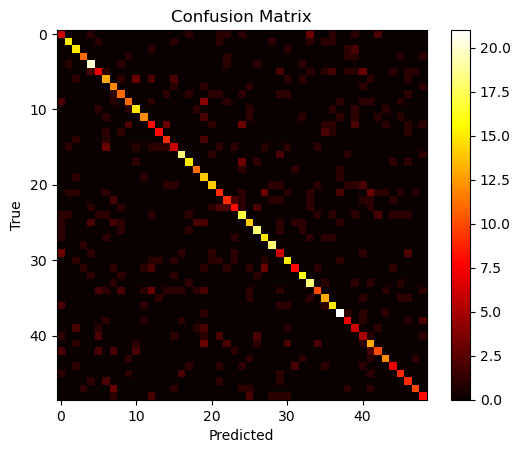

In [14]:
importlib.reload(md)
mejora = {}
mejora["Rate scheduling lineal"] = 0.001
rsl = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(rsl.forward_pass(X_val, False), y_val)


Epoch 0, Loss: 3.304940408839356
loss val: 1.1411897219240685
Epoch 10, Loss: 0.7334691187330172
loss val: 0.5694587267230669
Epoch 20, Loss: 0.2289363128640593
loss val: 0.6125348332442242
Epoch 30, Loss: 0.07862602362675751
loss val: 0.6849610376940328
Epoch 40, Loss: 0.033847595678343716
loss val: 0.7292280195603429
Epoch 50, Loss: 0.02018963907752457
loss val: 0.7558844827874444
Epoch 60, Loss: 0.014441578115182591
loss val: 0.7856027225947771
Epoch 70, Loss: 0.010705326842354777
loss val: 0.8069348120156513
Epoch 80, Loss: 0.008432199140547903
loss val: 0.8263435848586819
Epoch 90, Loss: 0.006951234478815819
loss val: 0.8410773688068665
Epoch 100, Loss: 0.005893336732136495
loss val: 0.8536567250342177
Epoch 110, Loss: 0.005098819007553656
loss val: 0.8652000087511253
Epoch 120, Loss: 0.004472851480285747
loss val: 0.8764069109860608
Epoch 130, Loss: 0.003981006655645863
loss val: 0.8843127104446317
Epoch 140, Loss: 0.0035790675931814627
loss val: 0.8937043247911964
Epoch 150, Los

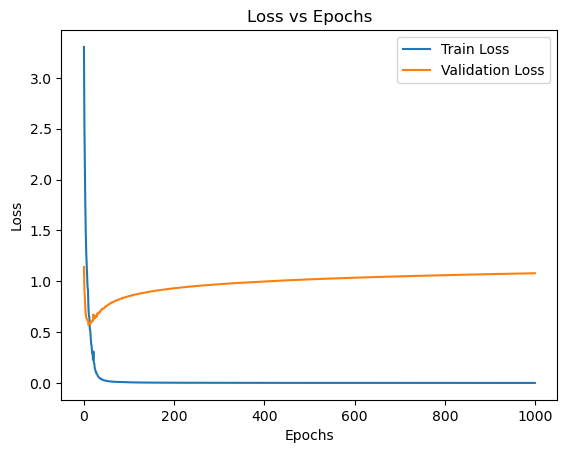

Accuracy: 0.6080
Cross Entropy: 3.4312


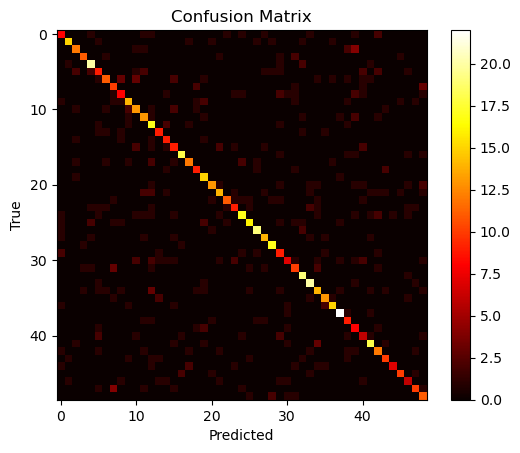

In [15]:
importlib.reload(md)
mejora = {}
mejora["Mini batch stochastic gradient descent"] = 64
minibatch_sgd = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(minibatch_sgd.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 2.9855690278657407
loss val: 1.051832695133207
Epoch 10, Loss: 0.4317102091941726
loss val: 0.5653130702366912
Epoch 20, Loss: 0.0967086221025953
loss val: 0.6310542221424736
Epoch 30, Loss: 0.02675544800511028
loss val: 0.7140698524790432
Epoch 40, Loss: 0.01161518413212931
loss val: 0.7689813256847539
Epoch 50, Loss: 0.006359925153651538
loss val: 0.8143008319447282
Epoch 60, Loss: 0.0038088950540320567
loss val: 0.8509307857886671
Epoch 70, Loss: 0.002464899959903562
loss val: 0.8830801261342284
Epoch 80, Loss: 0.0016697705914687192
loss val: 0.9148168644767273
Epoch 90, Loss: 0.0011483672797585594
loss val: 0.9407827011576887
Epoch 100, Loss: 0.0008163371413696135
loss val: 0.9645308319285132
Epoch 110, Loss: 0.0005887221682771796
loss val: 0.987841916884102
Epoch 120, Loss: 0.0004303272554947815
loss val: 1.0096453949037256
Epoch 130, Loss: 0.0003176927780524967
loss val: 1.031245548341664
Epoch 140, Loss: 0.00023449941791281567
loss val: 1.0525032698985552
Epoch 15

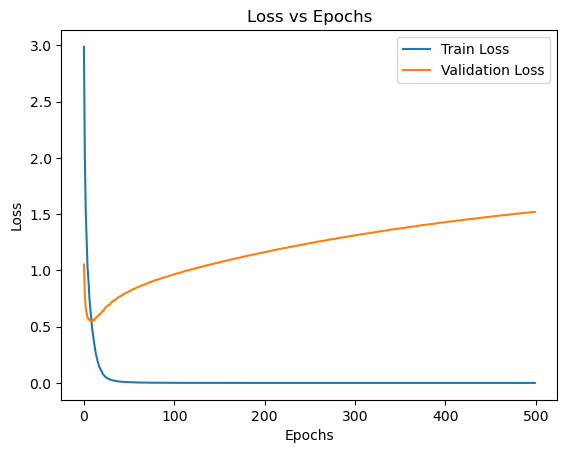

Accuracy: 0.5980
Cross Entropy: 5.6489


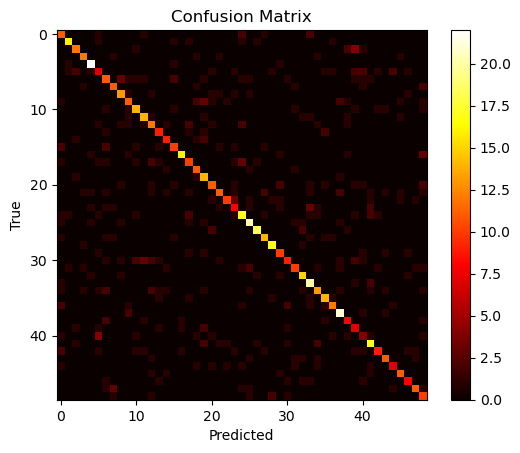

In [16]:
# ADAM
importlib.reload(md)
mejora = {}
mejora["ADAM"] = [0.9, 0.999, 1e-8]
mejora["Mini batch stochastic gradient descent"] = 64
adam = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora, 0.001, 500)
get_metrics = mt.get_metrics(adam.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 3.9754684121099464
loss val: 1.3333232177956837
Epoch 10, Loss: 3.785498705245604
loss val: 1.2785722957709267
Epoch 20, Loss: 3.6343651055653843
loss val: 1.2393705998566844
Epoch 30, Loss: 3.458532788858477
loss val: 1.1940768955010546
Epoch 40, Loss: 3.2555192286485646
loss val: 1.141215693261062
Epoch 50, Loss: 3.027273351466236
loss val: 1.079604214230425
Epoch 60, Loss: 2.7902559128432833
loss val: 1.0129525887520778
Epoch 70, Loss: 2.568631159910042
loss val: 0.9503387972259
Epoch 80, Loss: 2.3748779022698665
loss val: 0.8960784250793133
Epoch 90, Loss: 2.20910562361856
loss val: 0.8498661707332578
Epoch 100, Loss: 2.0681359760873472
loss val: 0.8113348201725862
Epoch 110, Loss: 1.9472155064830923
loss val: 0.7791082946189485
Epoch 120, Loss: 1.8428583731902597
loss val: 0.7521353069859948
Epoch 130, Loss: 1.7514482833541711
loss val: 0.7296021564652131
Epoch 140, Loss: 1.6706253669040674
loss val: 0.7107169925264549
Epoch 150, Loss: 1.5982709263266708
loss val: 0

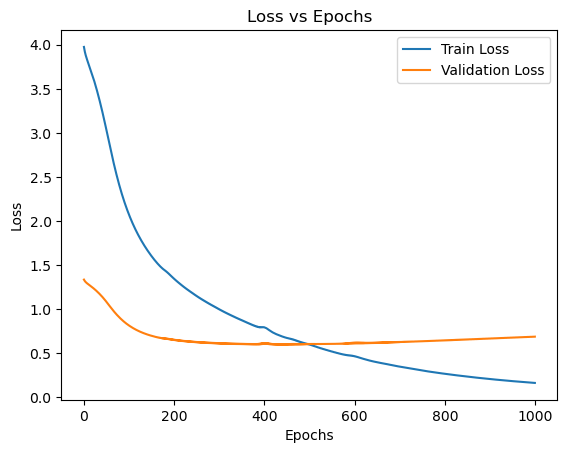

Accuracy: 0.5430
Cross Entropy: 2.0537


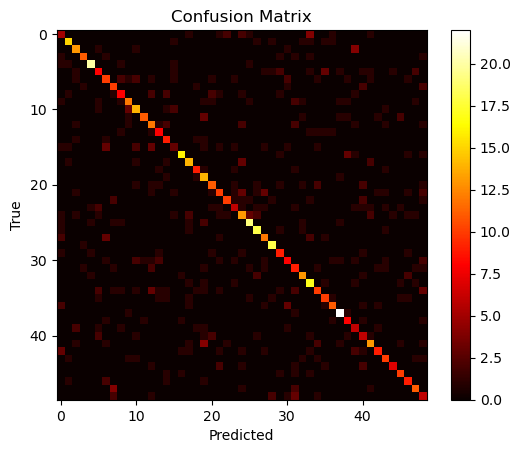

In [17]:
# regularización L2
importlib.reload(md)
mejora = {}
mejora["L2"] = 0.01
l2 = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(l2.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 3.9595949521335143
loss val: 1.3228691689403602
Epoch 10, Loss: 3.787322276727412
loss val: 1.2727315039486913
Epoch 20, Loss: 3.6617408587505875
loss val: 1.2392334172579986
Epoch 30, Loss: 3.514307206053354
loss val: 1.2001775450306693
Epoch 40, Loss: 3.3359519041042374
loss val: 1.151940847354852
Epoch 50, Loss: 3.1224120233040287
loss val: 1.0941930680957725
Epoch 60, Loss: 2.891593017827597
loss val: 1.0302507971410795
Epoch 70, Loss: 2.665355237869148
loss val: 0.9663808756520105
Epoch 80, Loss: 2.462387088709389
loss val: 0.9094457046111402
Epoch 90, Loss: 2.287844574934666
loss val: 0.8609346201568953
Epoch 100, Loss: 2.1391915284852385
loss val: 0.8203988536440049
Epoch 110, Loss: 2.0124885533940193
loss val: 0.7864570983795981
Epoch 120, Loss: 1.9036417854921164
loss val: 0.7582970951206464
Epoch 130, Loss: 1.8081137335439983
loss val: 0.7346841382853599
Epoch 140, Loss: 1.724047431900515
loss val: 0.7146710060409774
Epoch 150, Loss: 1.6488107012160444
loss val

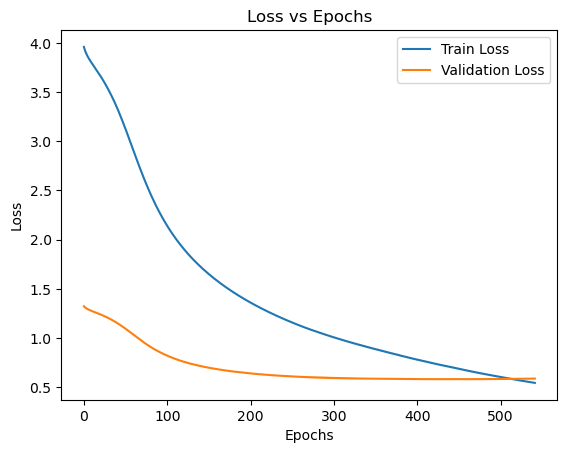

Accuracy: 0.5640
Cross Entropy: 1.7634


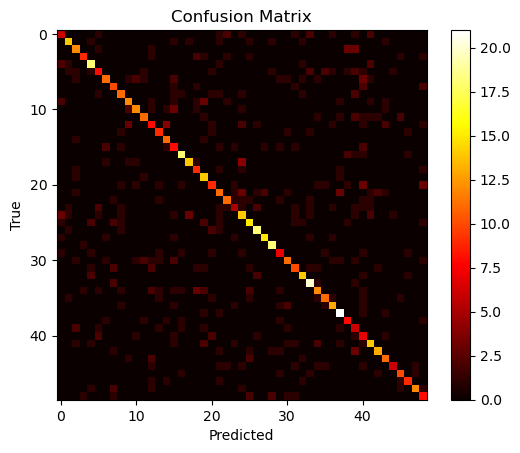

In [29]:
# Early stopping
importlib.reload(md)
mejora = {}
mejora["Early stopping"] = 5
early_stopping = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)

get_metrics = mt.get_metrics(early_stopping.forward_pass(X_val, False), y_val)

Epoch 0, Loss: 3.9324548958244607
loss val: 1.309392567619116
Epoch 10, Loss: 3.8361403913351344
loss val: 1.2816274106721093
Epoch 20, Loss: 3.807086052902055
loss val: 1.2748175561619493
Epoch 30, Loss: 3.777178208614731
loss val: 1.2672458002777887
Epoch 40, Loss: 3.745092299648956
loss val: 1.2581791699313205
Epoch 50, Loss: 3.7083849701212936
loss val: 1.2482994121127113
Epoch 60, Loss: 3.6661297244515887
loss val: 1.2364457125938728
Epoch 70, Loss: 3.6217549403096134
loss val: 1.223955951684443
Epoch 80, Loss: 3.573814607257028
loss val: 1.2105844810379265
Epoch 90, Loss: 3.5230587486879377
loss val: 1.1970311291504434
Epoch 100, Loss: 3.4689502957856675
loss val: 1.1824194126142413
Epoch 110, Loss: 3.4156350479160706
loss val: 1.1685329699704086
Epoch 120, Loss: 3.360357251011906
loss val: 1.153528005374929
Epoch 130, Loss: 3.3050272730669343
loss val: 1.1388478854372788
Epoch 140, Loss: 3.246678915852251
loss val: 1.1227103445597082
Epoch 150, Loss: 3.1906673051820813
loss val:

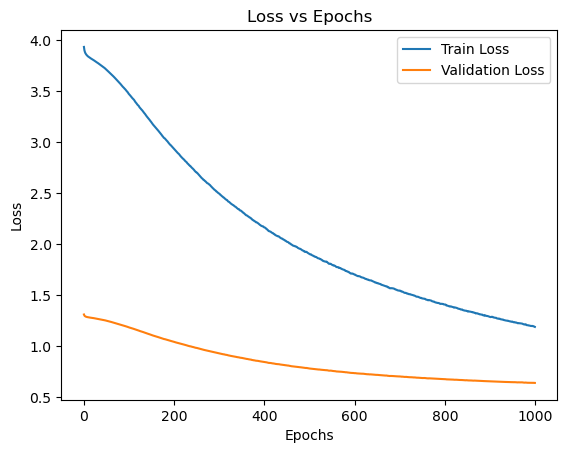

Accuracy: 0.5240
Cross Entropy: 1.9151


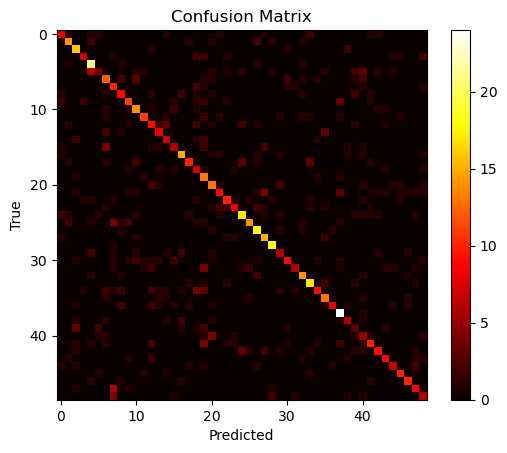

In [19]:
# dropout
importlib.reload(md)
mejora = {}
mejora["Dropout"] = 0.5
dropout = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejora)
get_metrics = mt.get_metrics(dropout.forward_pass(X_val, False), y_val)

In [20]:
# # batch normalization
# importlib.reload(md)
# mejoras = {}
# mejoras[] = 0.9
# batch_norm = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, mejoras)
# get_metrics = m"Batch normalization"t.get_metrics(batch_norm.forward_pass(X_val, False), y_val)

Explorar cambios en la arquitectura de la red (es decir, la cantidad de capas ocultas y unidades ocultas por capa), y los hiperparámetros (cada uno de los items en la lista anterior tiene una serie de parámetros que podemos variar), y determinar la configuración que funcione mejor (menor error de validación). Llamaremos a este modelo M1

In [21]:
# vemos la mejor arquitectura
layer_configs = [
    [64],                # 1 capa
    [64, 32],            # 2 capas, más chica
    [80, 100],           # la que ya usás
    [128, 64],           # más profunda que la tuya
    [128, 64, 32],       # 3 capas, decreciente
    [100, 100, 100, 100, 100, 100],  # 5 capas, todas iguales
    [200, 250, 300],  # 3 capas, todas más grandes
]


In [24]:
mejoras = {}
mejoras["Early stopping"] = 5

Probamos siempre con early stopping para acortar el tiempo de entrenamiento evitando, además, el overfitting.

-------------------- 1 capa de 64 nodos --------------------
Epoch 0, Loss: 3.9692738567164696
loss val: 1.3244185095286976
Epoch 10, Loss: 3.7385422181130803
loss val: 1.256149031612789
Epoch 20, Loss: 3.5800379948014536
loss val: 1.2111251287228844
Epoch 30, Loss: 3.412491062460309
loss val: 1.166087551086946
Epoch 40, Loss: 3.2434984460063174
loss val: 1.1204100711167766
Epoch 50, Loss: 3.0757521874261755
loss val: 1.0745423069587259
Epoch 60, Loss: 2.9157114183366692
loss val: 1.0306742129020887
Epoch 70, Loss: 2.767679264981493
loss val: 0.989427683146628
Epoch 80, Loss: 2.63152284361142
loss val: 0.9510573516227531
Epoch 90, Loss: 2.506450944485996
loss val: 0.9158905290590786
Epoch 100, Loss: 2.3938367353956296
loss val: 0.8843336289988287
Epoch 110, Loss: 2.2926162288903797
loss val: 0.8564031114018126
Epoch 120, Loss: 2.2020557423850535
loss val: 0.8317150443709571
Epoch 130, Loss: 2.1208571127337454
loss val: 0.8099176017140617
Epoch 140, Loss: 2.0476201336716184
loss val: 0.

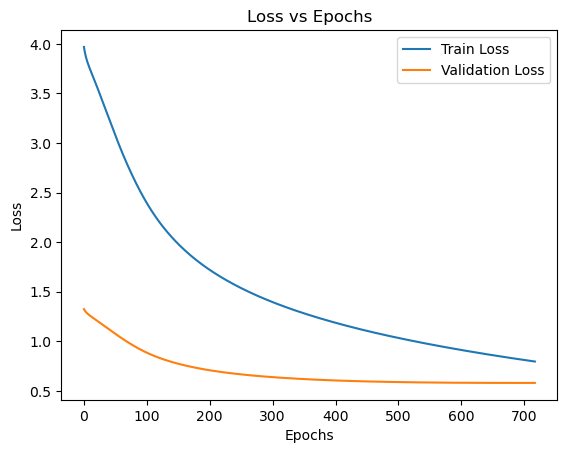

Accuracy: 0.5510
Cross Entropy: 1.7390


In [30]:
# una capa de 64 nodos
importlib.reload(md)
importlib.reload(mt)
print("-"*20, "1 capa de 64 nodos", "-"*20)
m0 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "softmax"], [64], mejoras)
mt.print_acc_ce(m0.forward_pass(X_val, False), y_val,)

In [ ]:
# 2 capas de 64 y 32 nodos
importlib.reload(md)
importlib.reload(mt)
print("-"*20, "2 capas de 64 y 32 nodos", "-"*20)
m1 = md.NeuralNetwork(X_train, y_train, X_val, y_val, ["ReLU", "ReLU", "softmax"], [64, 32], mejoras)
print("Accuracy val: ", mt.accuracy(m1.forward_pass(X_val, False), y_val))
print("F1 val: ", mt.f1_score(m1.forward_pass(X_val, False), y_val))

In [ ]:
#

In [22]:
# grid search
# definimos hiperparametros a probar 
importlib.reload(md)
importlib.reload(ds)
importlib.reload(mt)
importlib.reload(aux)

learning_rates = [0.001, 0.01, 0.1]
adam_betas = [None,(0.9, 0.999, 1e-8), (0.8, 0.999, 1e-8), (0.9, 0.99, 1e-8)]
rsl = [None, 0.001, 0.01]
batch_size = [None, 32, 64]
l2_lambda = [None, 0.0001, 0.001]
early_stopping_patience = [None, 5]
dropout = [None, 0.8, 0.5]
batch_norm = [None, 0.9]

# Arquitecturas posibles (ejemplos)
layer_configs = [
    [64],                # 1 capa
    [64, 32],            # 2 capas, más chica
    [80, 100],           # la que ya usás
    [128, 64],           # más profunda que la tuya
    [128, 64, 32],       # 3 capas, decreciente
    [100, 100, 100, 100, 100, 100],  # 5 capas, todas iguales
    [200, 250, 300],  # 3 capas, todas más grandes
]

m = {}
m = {
    "Rate scheduling lineal": None,
    "Mini batch stochastic gradient descent": None,
    "ADAM": None,
    "L2": None,
    "Early stopping": None,
    "Dropout": None,
    "Batch normalization": None,
    "Grid search": None
}
# mod = md.NeuralNetwork(X_train, y_train, X_val, y_val, funciones_de_activacion, nodos_por_capa, m)
aux.grid_search(X_train, y_train, X_val, y_val, learning_rates, adam_betas, rsl, batch_size, l2_lambda, early_stopping_patience, dropout, batch_norm, layer_configs)


AttributeError: module 'auxiliares' has no attribute 'grid_search'